<h1> Esame CSL 27/08/2024 </h1>
<h2> Francesco Malferrari 193103 </h2>
<h3> Corso di laurea: Laura Magistrale in Informatica </h3>

Inizio installando <b><a href="https://medmnist.com/">MedMnist</a></b> <br> <br>
Citazione: <br>
  Jiancheng Yang, Rui Shi, Donglai Wei, Zequan Liu, Lin Zhao, Bilian Ke, Hanspeter Pfister, Bingbing Ni. Yang, Jiancheng, et al. "MedMNIST v2-A large-scale lightweight benchmark for 2D and 3D biomedical image classification." Scientific Data, 2023.
                            
  Jiancheng Yang, Rui Shi, Bingbing Ni. "MedMNIST Classification Decathlon: A Lightweight AutoML Benchmark for Medical Image Analysis". IEEE 18th International Symposium on Biomedical Imaging (ISBI), 2021.

In [1]:
!pip install medmnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Utilizzo il dataset <b>PneumoniaMNIST</b> composto da 5856 immagini a raggi X di petti di bambini con un'etichetta che indica se sono affetti o no da polmonite (0 è normale, 1 ha la polmonite)

In [3]:
from medmnist import PneumoniaMNIST

dimensioni = [28, 64, 128, 224]
dimensione = dimensioni[0]

# Train dataset: 4708 images
train = PneumoniaMNIST(split="train", download=True, size=dimensione)

# Test dataset: 524 images
test = PneumoniaMNIST(split="test", download=True, size=dimensione)

# Validation dataset: 624 images
val = PneumoniaMNIST(split="val", download=True, size=dimensione)

Using downloaded and verified file: C:\Users\malfi\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\malfi\.medmnist\pneumoniamnist.npz
Using downloaded and verified file: C:\Users\malfi\.medmnist\pneumoniamnist.npz


Le immagini sono 28x28 e sono divise in:
<ul>
    <li>Training set: 4708</li>
    <li>Validation set: 524</li>
    <li>Test set: 624</li>
</ul>

In [4]:
train

Dataset PneumoniaMNIST of size 28 (pneumoniamnist)
    Number of datapoints: 4708
    Root location: C:\Users\malfi\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [5]:
print(train[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x248BD7DC0D0>, array([1]))


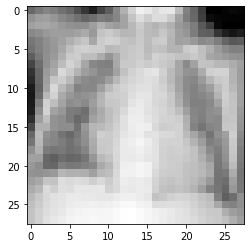

In [6]:
# Display image
plt.imshow(np.reshape(train[0][0], (dimensione,dimensione,1)), cmap='gray')

Normalizzo e creo gli array

In [8]:
arr_train = np.array([np.array(immagine[0]).flatten() for immagine in train]).astype('float32') / 255.
arr_val = np.array([np.array(immagine[0]).flatten() for immagine in val]).astype('float32') / 255.
arr_test = np.array([np.array(immagine[0]).flatten() for immagine in test]).astype('float32') / 255.

In [9]:
inizio_train = 0
fine_train = len(arr_train)
inizio_val = fine_train
fine_val = fine_train+len(arr_val)
inizio_test = fine_val
fine_test = fine_val+len(arr_test)

print(str(inizio_train)+" "+str(fine_train)+"\n"+str(inizio_val)+" "+str(fine_val)+"\n"+str(inizio_test)+" "+str(fine_test))

0 4708
4708 5232
5232 5856


Creo le label

In [10]:
arr_train_label = np.concatenate([i[1] for i in train])
arr_val_label = np.concatenate([i[1] for i in val])
arr_test_label = np.concatenate([i[1] for i in test])

train_val_label = np.concatenate((arr_train_label,arr_val_label), axis = 0)
train_test_label = np.concatenate((arr_train_label,arr_val_label,arr_test_label), axis = 0)

In [11]:
arr = np.concatenate((arr_train,arr_val,arr_test),axis=0)
arr

array([[0.36078432, 0.42352942, 0.45882353, ..., 0.65882355, 0.6039216 ,
        0.54509807],
       [0.4509804 , 0.4627451 , 0.45882353, ..., 0.7176471 , 0.6901961 ,
        0.6627451 ],
       [0.58431375, 0.57254905, 0.5764706 , ..., 0.7372549 , 0.6627451 ,
        0.6156863 ],
       ...,
       [0.7254902 , 0.7372549 , 0.7294118 , ..., 0.67058825, 0.627451  ,
        0.6039216 ],
       [0.15294118, 0.20784314, 0.32941177, ..., 0.63529414, 0.60784316,
        0.58431375],
       [0.05882353, 0.07450981, 0.08627451, ..., 0.7411765 , 0.6862745 ,
        0.43529412]], dtype=float32)

Faccio i grafici <b><a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a></b> del dataset con 2 componenti principali:

In [106]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
Xt = pca.fit_transform(arr)

In [13]:
def graficoPCA2(Xt1,Xt2,cl):
    plot = plt.scatter(Xt1, Xt2, c=cl)
    plt.legend(handles=plot.legend_elements()[0], labels=list(np.unique(arr_train_label).astype(np.int64)))
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.show()

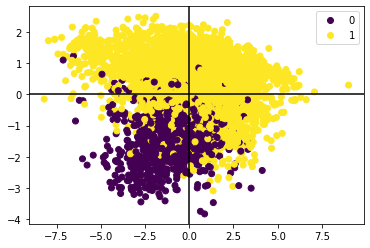

In [14]:
# Training
graficoPCA2(Xt[inizio_train:fine_train,0],Xt[inizio_train:fine_train,1],list(arr_train_label.astype(np.int64)))

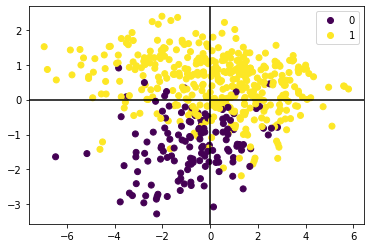

In [107]:
# Validation
graficoPCA2(Xt[inizio_val:fine_val,0],Xt[inizio_val:fine_val,1],list(arr_val_label.astype(np.int64)))

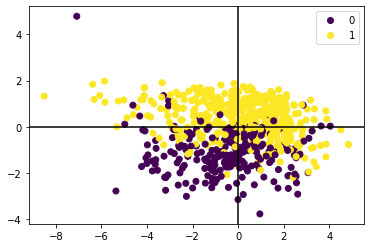

In [15]:
# Test
graficoPCA2(Xt[inizio_test:fine_test,0],Xt[inizio_test:fine_test,1],list(arr_test_label.astype(np.int64)))

Ottengo un grafico e una lista in ordine drecrescente delle componenti principali con la percentuale di immagine rappresentata

In [17]:
covarianza = np.cov(np.transpose(arr_train))
covarianza

array([[0.0312668 , 0.02975934, 0.02732017, ..., 0.00815819, 0.00942262,
        0.01059094],
       [0.02975934, 0.03176627, 0.03107584, ..., 0.00774073, 0.00867247,
        0.00974506],
       [0.02732017, 0.03107584, 0.03376412, ..., 0.00754055, 0.00861237,
        0.01008434],
       ...,
       [0.00815819, 0.00774073, 0.00754055, ..., 0.02000582, 0.0217218 ,
        0.02096013],
       [0.00942262, 0.00867247, 0.00861237, ..., 0.0217218 , 0.0298541 ,
        0.03278605],
       [0.01059094, 0.00974506, 0.01008434, ..., 0.02096013, 0.03278605,
        0.0442687 ]])

In [18]:
from numpy import linalg as LA
autovalori = LA.eigvals(covarianza)
autovalori

array([5.03411875e+00, 1.28247825e+00, 9.31803910e-01, 6.95689067e-01,
       5.51821338e-01, 4.44436963e-01, 4.21213986e-01, 3.25636150e-01,
       2.74622264e-01, 2.18015134e-01, 1.97510237e-01, 1.72740028e-01,
       1.55791341e-01, 1.49679308e-01, 1.33184603e-01, 1.11294374e-01,
       9.96014502e-02, 8.53467583e-02, 8.17596676e-02, 7.88630207e-02,
       6.70183866e-02, 6.57622433e-02, 6.25643433e-02, 5.16894519e-02,
       4.84369495e-02, 4.64258199e-02, 4.51638465e-02, 3.98951452e-02,
       3.83796776e-02, 3.80057477e-02, 3.62463040e-02, 3.38760125e-02,
       3.07016405e-02, 2.90236311e-02, 2.86257218e-02, 2.59922831e-02,
       2.47976825e-02, 2.39553658e-02, 2.29218284e-02, 2.20631241e-02,
       2.18431474e-02, 2.04589778e-02, 1.90333240e-02, 1.89120373e-02,
       1.78360025e-02, 1.74998388e-02, 1.70235658e-02, 1.58623408e-02,
       1.49330337e-02, 1.46127541e-02, 1.45965312e-02, 1.39195015e-02,
       1.33053388e-02, 1.28879222e-02, 1.24446802e-02, 1.19907491e-02,
      

In [19]:
totale = np.sum(autovalori)
totale

13.292795876217038

In [20]:
cum = np.cumsum(autovalori)
cum

array([ 5.03411875,  6.316597  ,  7.24840091,  7.94408998,  8.49591132,
        8.94034828,  9.36156227,  9.68719842,  9.96182068, 10.17983581,
       10.37734605, 10.55008608, 10.70587742, 10.85555673, 10.98874133,
       11.1000357 , 11.19963715, 11.28498391, 11.36674358, 11.4456066 ,
       11.51262499, 11.57838723, 11.64095157, 11.69264103, 11.74107798,
       11.7875038 , 11.83266764, 11.87256279, 11.91094247, 11.94894821,
       11.98519452, 12.01907053, 12.04977217, 12.0787958 , 12.10742152,
       12.13341381, 12.15821149, 12.18216685, 12.20508868, 12.22715181,
       12.24899495, 12.26945393, 12.28848726, 12.30739929, 12.3252353 ,
       12.34273513, 12.3597587 , 12.37562104, 12.39055408, 12.40516683,
       12.41976336, 12.43368286, 12.4469882 , 12.45987612, 12.4723208 ,
       12.48431155, 12.49612088, 12.50769338, 12.5190864 , 12.53002349,
       12.54082497, 12.55126313, 12.56149109, 12.57138586, 12.58111149,
       12.59058778, 12.59983193, 12.60891516, 12.61777804, 12.62

In [21]:
cum_norm = cum/totale
cum_norm

array([0.3787103 , 0.4751895 , 0.54528791, 0.59762371, 0.63913652,
       0.67257094, 0.70425833, 0.72875552, 0.749415  , 0.765816  ,
       0.78067445, 0.79366946, 0.80538944, 0.81664962, 0.82666893,
       0.83504146, 0.84253435, 0.84895488, 0.85510555, 0.86103832,
       0.86608003, 0.87102723, 0.87573387, 0.8796224 , 0.88326625,
       0.88675881, 0.89015642, 0.89315768, 0.89604494, 0.89890406,
       0.90163083, 0.90417927, 0.90648892, 0.90867233, 0.91082581,
       0.91278117, 0.91464667, 0.9164488 , 0.91817318, 0.91983296,
       0.92147619, 0.9230153 , 0.92444715, 0.92586988, 0.92721166,
       0.92852815, 0.92980881, 0.93100211, 0.93212551, 0.9332248 ,
       0.93432288, 0.93537003, 0.93637097, 0.93734051, 0.93827671,
       0.93917876, 0.94006716, 0.94093774, 0.94179483, 0.94261761,
       0.94343019, 0.94421544, 0.94498488, 0.94572925, 0.9464609 ,
       0.94717379, 0.94786921, 0.94855253, 0.94921927, 0.94987007,
       0.9505095 , 0.95112963, 0.95173934, 0.95233941, 0.95293

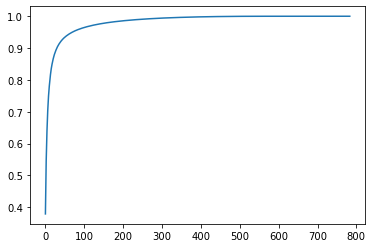

In [22]:
plt.plot(cum_norm)

In [23]:
s = np.sort(cum_norm)
for i in range(len(np.transpose(cum_norm))):
    print("Percentuale dell'informazione: "+str(s[i])+"\t\tPC:"+str(i+1))

Percentuale dell'informazione: 0.37871030304869435		PC:1
Percentuale dell'informazione: 0.47518949837575997		PC:2
Percentuale dell'informazione: 0.5452879124623385		PC:3
Percentuale dell'informazione: 0.5976237095011921		PC:4
Percentuale dell'informazione: 0.6391365216079435		PC:5
Percentuale dell'informazione: 0.6725709447844894		PC:6
Percentuale dell'informazione: 0.704258333170745		PC:7
Percentuale dell'informazione: 0.7287555234751368		PC:8
Percentuale dell'informazione: 0.7494150044973217		PC:9
Percentuale dell'informazione: 0.7658160036256142		PC:10
Percentuale dell'informazione: 0.7806744456742778		PC:11
Percentuale dell'informazione: 0.7936694565943585		PC:12
Percentuale dell'informazione: 0.8053894395104709		PC:13
Percentuale dell'informazione: 0.8166496220470812		PC:14
Percentuale dell'informazione: 0.8266689290496533		PC:15
Percentuale dell'informazione: 0.8350414621695342		PC:16
Percentuale dell'informazione: 0.8425343516331392		PC:17
Percentuale dell'informazione: 0.848954

In [108]:
pc = np.argmax(cum_norm >= 0.999) + 1
pc

444

Per rappresentare il 99.9% dell'immagine bastano 444 PC anziché 784. <br>
Svolgo un'analisi <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a> per estrarre le features più importanti.

In [25]:
pca = PCA(n_components=pc)

In [26]:
arr_transformed = pca.fit_transform(arr)
arr_transformed

array([[ 6.2775946e-01, -4.9916461e-01,  1.6556412e+00, ...,
        -1.2963021e-02, -1.1656495e-02,  3.8950099e-03],
       [ 1.6982427e+00, -5.4402256e-01, -9.4337463e-01, ...,
        -1.1770480e-03,  6.0222191e-03,  1.7087223e-03],
       [ 2.2557409e+00, -1.3673313e+00,  1.7985137e-01, ...,
        -5.5803446e-04, -4.7922479e-03,  5.4110410e-03],
       ...,
       [ 2.1752172e+00, -1.0192205e+00, -1.2034812e+00, ...,
        -6.9907419e-03,  7.2307466e-03, -2.3716604e-03],
       [-1.6437618e+00,  2.4618299e-01, -1.1519715e+00, ...,
         6.9858152e-03,  5.2822661e-03,  9.1463430e-03],
       [ 3.6258864e-01, -1.7909353e+00,  5.6940109e-01, ...,
         2.1690037e-03,  9.1233384e-03,  8.4004318e-04]], dtype=float32)

In [27]:
arr_reconstructed = pca.inverse_transform(arr_transformed)
arr_reconstructed

array([[0.3603885 , 0.42313784, 0.4582621 , ..., 0.6584443 , 0.6096264 ,
        0.5451753 ],
       [0.45279908, 0.46333513, 0.45767164, ..., 0.7151351 , 0.68459797,
        0.6587984 ],
       [0.58621806, 0.57193804, 0.5766375 , ..., 0.75482166, 0.64588153,
        0.6248259 ],
       ...,
       [0.72559965, 0.73874587, 0.7280953 , ..., 0.6706799 , 0.62801033,
        0.6039929 ],
       [0.15126948, 0.20878714, 0.32884455, ..., 0.63465285, 0.60663265,
        0.5829374 ],
       [0.06098515, 0.06976083, 0.08732027, ..., 0.73306185, 0.6913368 ,
        0.4358329 ]], dtype=float32)

L'immagine ricostruita con 444 PC:

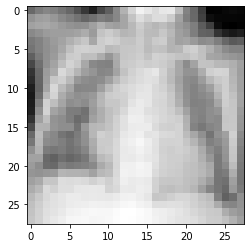

In [28]:
# Display image
plt.imshow(np.reshape(arr_reconstructed[0], (28,28,1)), cmap='gray')

L'immagine originale:

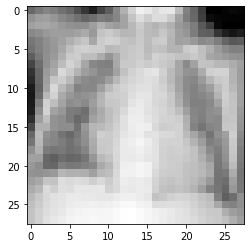

In [29]:
# Display image
plt.imshow(np.reshape(arr[0], (28,28,1)), cmap='gray')

L'errore:

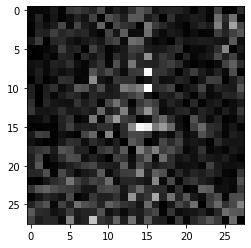

In [30]:
# Display image
plt.imshow(np.reshape(abs(arr[0] - arr_reconstructed[0]),(28,28,1)), cmap='gray')

Classificazione binaria con <b><a href="https://scikit-learn.org/stable/modules/svm.html">SVM</a></b> addestrando con le immagini da 444 PC

In [31]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [32]:
def Modello_SVM(vkernel,vgamma,vC):
    return SVC(kernel = vkernel, gamma = vgamma, C=vC)

In [33]:
def classificazioneSVM(SVMModel, arr_train, arr_train_label, arr_test, arr_test_label):
    SVMModel.fit(X=arr_train, y=arr_train_label)
    pred_labels = SVMModel.predict(arr_test)
    return pred_labels, accuracy_score(arr_test_label, pred_labels)

Uso il <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> per individuare la migliore combinazione di parametri C e gamma fissato il kernel. <br>
Il validation set è usato in cross validazione.

In [34]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit

In [35]:
test_fold = [-1] * len(arr_train_label) + [0] * len(arr_val_label)
ps = PredefinedSplit(test_fold)

Kernel lineare

In [36]:
# defining parameter range
param_grid_linear = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                     'gamma': [10, 1.0, 0.1, 0.01, 0.001, 0.0001],
                     'kernel': ['linear']}

grid_linear = GridSearchCV(SVC(), param_grid_linear, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_linear.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
[CV 1/1] END .................C=0.1, gamma=10, kernel=linear; total time=   1.0s
[CV 1/1] END ................C=0.1, gamma=1.0, kernel=linear; total time=   1.1s
[CV 1/1] END ................C=0.1, gamma=0.1, kernel=linear; total time=   1.1s
[CV 1/1] END ...............C=0.1, gamma=0.01, kernel=linear; total time=   1.3s
[CV 1/1] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.1s
[CV 1/1] END .............C=0.1, gamma=0.0001, kernel=linear; total time=   1.1s
[CV 1/1] END .................C=1.0, gamma=10, kernel=linear; total time=   1.3s
[CV 1/1] END ................C=1.0, gamma=1.0, kernel=linear; total time=   1.2s
[CV 1/1] END ................C=1.0, gamma=0.1, kernel=linear; total time=   1.5s
[CV 1/1] END ...............C=1.0, gamma=0.01, kernel=linear; total time=   1.8s
[CV 1/1] END ..............C=1.0, gamma=0.001, kernel=linear; total time=   1.1s
[CV 1/1] END .............C=1.0, gamma=0.0001, k

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [10, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [37]:
grid_linear.best_params_

{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}

In [38]:
grid_linear.best_score_

0.9561068702290076

In [76]:
SVMModel_linear = Modello_SVM(grid_linear.best_params_['kernel'], grid_linear.best_params_['gamma'],
                              grid_linear.best_params_['C'])

In [77]:
pred_linear, acc_linear = classificazioneSVM(SVMModel_linear, arr_transformed[inizio_train:fine_train], arr_train_label,
                                             arr_transformed[inizio_test:fine_test], arr_test_label)
acc_linear

0.8397435897435898

Kernel polinomiale

In [41]:
# defining parameter range
param_grid_poly = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                   'gamma': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
                   'kernel': ['poly']}

grid_poly = GridSearchCV(SVC(), param_grid_poly, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_poly.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
[CV 1/1] END .................C=0.1, gamma=10.0, kernel=poly; total time=   1.2s
[CV 1/1] END ..................C=0.1, gamma=1.0, kernel=poly; total time=   1.1s
[CV 1/1] END ..................C=0.1, gamma=0.1, kernel=poly; total time=   1.7s
[CV 1/1] END .................C=0.1, gamma=0.01, kernel=poly; total time=   2.8s
[CV 1/1] END ................C=0.1, gamma=0.001, kernel=poly; total time=   2.3s
[CV 1/1] END ...............C=0.1, gamma=0.0001, kernel=poly; total time=   2.2s
[CV 1/1] END .................C=1.0, gamma=10.0, kernel=poly; total time=   1.0s
[CV 1/1] END ..................C=1.0, gamma=1.0, kernel=poly; total time=   1.0s
[CV 1/1] END ..................C=1.0, gamma=0.1, kernel=poly; total time=   1.4s
[CV 1/1] END .................C=1.0, gamma=0.01, kernel=poly; total time=   3.4s
[CV 1/1] END ................C=1.0, gamma=0.001, kernel=poly; total time=   3.2s
[CV 1/1] END ...............C=1.0, gamma=0.0001,

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['poly']},
             verbose=3)

In [42]:
grid_poly.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'poly'}

In [43]:
grid_poly.best_score_

0.9599236641221374

In [78]:
SVMModel_poly = Modello_SVM(grid_poly.best_params_['kernel'], grid_poly.best_params_['gamma'],
                            grid_poly.best_params_['C'])

In [79]:
pred_poly, acc_poly = classificazioneSVM(SVMModel_poly, arr_transformed[inizio_train:fine_train], arr_train_label,
                                         arr_transformed[inizio_test:fine_test], arr_test_label)
acc_poly

0.8349358974358975

Kernel gaussiano

In [46]:
# defining parameter range
param_grid_rbf = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                  'gamma': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}

grid_rbf = GridSearchCV(SVC(), param_grid_rbf, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_rbf.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 30 candidates, totalling 30 fits
[CV 1/1] END ..................C=0.1, gamma=10.0, kernel=rbf; total time=   6.0s
[CV 1/1] END ...................C=0.1, gamma=1.0, kernel=rbf; total time=   5.6s
[CV 1/1] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   1.7s
[CV 1/1] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   3.2s
[CV 1/1] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   3.7s
[CV 1/1] END ................C=0.1, gamma=0.0001, kernel=rbf; total time=   3.6s
[CV 1/1] END ..................C=1.0, gamma=10.0, kernel=rbf; total time=   6.1s
[CV 1/1] END ...................C=1.0, gamma=1.0, kernel=rbf; total time=   6.4s
[CV 1/1] END ...................C=1.0, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 1/1] END ..................C=1.0, gamma=0.01, kernel=rbf; total time=   1.1s
[CV 1/1] END .................C=1.0, gamma=0.001, kernel=rbf; total time=   2.0s
[CV 1/1] END ................C=1.0, gamma=0.0001

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'gamma': [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [47]:
grid_rbf.best_params_

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [48]:
grid_rbf.best_score_

0.9656488549618321

In [80]:
SVMModel_rbf = Modello_SVM(grid_rbf.best_params_['kernel'],grid_rbf.best_params_['gamma'],
                           grid_rbf.best_params_['C'])

In [81]:
pred_rbf, acc_rbf = classificazioneSVM(SVMModel_rbf, arr_transformed[inizio_train:fine_train], arr_train_label,
                                       arr_transformed[inizio_test:fine_test], arr_test_label)
acc_rbf

0.8541666666666666

Kernel gaussiano con range più ristretto di gamma

In [51]:
# defining parameter range
param_grid_rbf_2 = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                  'gamma': [0.08, 0.09, 0.1, 0.11, 0.12],
                  'kernel': ['rbf']}

grid_rbf_2 = GridSearchCV(SVC(), param_grid_rbf_2, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_rbf_2.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 45 candidates, totalling 45 fits
[CV 1/1] END ....................C=1, gamma=0.08, kernel=rbf; total time=   1.3s
[CV 1/1] END ....................C=1, gamma=0.09, kernel=rbf; total time=   1.1s
[CV 1/1] END .....................C=1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV 1/1] END ....................C=1, gamma=0.11, kernel=rbf; total time=   1.3s
[CV 1/1] END ....................C=1, gamma=0.12, kernel=rbf; total time=   1.3s
[CV 1/1] END ....................C=2, gamma=0.08, kernel=rbf; total time=   1.3s
[CV 1/1] END ....................C=2, gamma=0.09, kernel=rbf; total time=   1.2s
[CV 1/1] END .....................C=2, gamma=0.1, kernel=rbf; total time=   1.2s
[CV 1/1] END ....................C=2, gamma=0.11, kernel=rbf; total time=   1.6s
[CV 1/1] END ....................C=2, gamma=0.12, kernel=rbf; total time=   1.7s
[CV 1/1] END ....................C=3, gamma=0.08, kernel=rbf; total time=   1.0s
[CV 1/1] END ....................C=3, gamma=0.09

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'gamma': [0.08, 0.09, 0.1, 0.11, 0.12],
                         'kernel': ['rbf']},
             verbose=3)

In [52]:
grid_rbf_2.best_params_

{'C': 3, 'gamma': 0.08, 'kernel': 'rbf'}

In [53]:
grid_rbf_2.best_score_

0.9694656488549618

In [82]:
SVMModel_rbf_2 = Modello_SVM(grid_rbf_2.best_params_['kernel'], grid_rbf_2.best_params_['gamma'],
                             grid_rbf_2.best_params_['C'])

In [83]:
pred_rbf_2, acc_rbf_2 = classificazioneSVM(SVMModel_rbf_2, arr_transformed[inizio_train:fine_train], arr_train_label,
                                           arr_transformed[inizio_test:fine_test], arr_test_label)
acc_rbf_2

0.8589743589743589

Uso un albero binario <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">DecisionTreeClassifier</a>

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [57]:
def classificazioneTree(arr_train, arr_train_label, arr_test, arr_test_label):
    clf = DecisionTreeClassifier()
    clf = clf.fit(arr_train,arr_train_label)
    pred_labels = clf.predict(arr_test)
    return clf, pred_labels, accuracy_score(arr_test_label, pred_labels)

In [58]:
clf_tree, pred_tree, acc_tree = classificazioneTree(arr_transformed[inizio_train:fine_train], arr_train_label,
                                                    arr_transformed[inizio_test:fine_test], arr_test_label)
acc_tree

0.7980769230769231

[Text(189.1907864874302, 213.0912, 'X[1] <= -0.585\ngini = 0.383\nsamples = 4708\nvalue = [1214, 3494]'),
 Text(92.13867842178772, 204.3936, 'X[0] <= 1.122\ngini = 0.414\nsamples = 1389\nvalue = [983, 406]'),
 Text(33.477077513966485, 195.696, 'X[2] <= -1.036\ngini = 0.263\nsamples = 1071\nvalue = [904, 167]'),
 Text(12.157541899441341, 186.9984, 'X[57] <= 0.05\ngini = 0.5\nsamples = 97\nvalue = [47, 50]'),
 Text(7.481564245810056, 178.3008, 'X[6] <= -0.33\ngini = 0.43\nsamples = 67\nvalue = [21, 46]'),
 Text(3.740782122905028, 169.60320000000002, 'X[26] <= -0.199\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'),
 Text(1.870391061452514, 160.9056, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(5.6111731843575425, 160.9056, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(11.222346368715085, 169.60320000000002, 'X[314] <= -0.056\ngini = 0.286\nsamples = 52\nvalue = [9, 43]'),
 Text(9.351955307262571, 160.9056, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(13.092737430167599, 160.

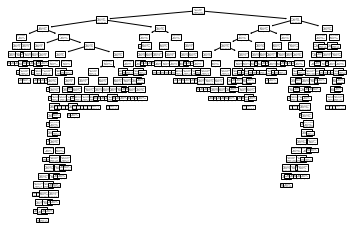

In [59]:
tree.plot_tree(clf_tree)

Uso un random forest con <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html">Bagging</a>

In [60]:
from sklearn.ensemble import BaggingClassifier

In [61]:
def classificazioneBagging(n, arr_train, arr_train_label, arr_test, arr_test_label):
    clf = BaggingClassifier(n_estimators=n).fit(arr_train, arr_train_label)
    pred_labels = clf.predict(arr_test)
    return clf, pred_labels, accuracy_score(arr_test_label, pred_labels)

Uso il <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> per individuare il numero di alberi.

In [62]:
# defining parameter range
param_grid_bagging = {'n_estimators': [1, 10, 50, 100, 200, 500, 1000, 2000]}

grid_bagging = GridSearchCV(BaggingClassifier(), param_grid_bagging, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_bagging.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END .................................n_estimators=1; total time=   2.4s
[CV 1/1] END ................................n_estimators=10; total time=  18.7s
[CV 1/1] END ................................n_estimators=50; total time= 1.6min
[CV 1/1] END ...............................n_estimators=100; total time= 2.7min
[CV 1/1] END ...............................n_estimators=200; total time= 5.5min
[CV 1/1] END ...............................n_estimators=500; total time=15.1min
[CV 1/1] END ..............................n_estimators=1000; total time=29.7min
[CV 1/1] END ..............................n_estimators=2000; total time=67.2min


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=BaggingClassifier(),
             param_grid={'n_estimators': [1, 10, 50, 100, 200, 500, 1000,
                                          2000]},
             verbose=3)

In [63]:
grid_bagging.best_params_

{'n_estimators': 1000}

In [64]:
grid_bagging.best_score_

0.933206106870229

In [69]:
clf_bagging, pred_bagging, acc_bagging = classificazioneBagging(grid_bagging.best_params_['n_estimators'], 
                                                                arr_transformed[inizio_train:fine_train], arr_train_label,
                                                                arr_transformed[inizio_test:fine_test], arr_test_label)
acc_bagging

0.8044871794871795

Uso un random forest con <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html">AdaBoost</a>

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
def classificazioneAdaBoost(n, arr_train, arr_train_label, arr_test, arr_test_label):
    clf = AdaBoostClassifier(n_estimators=n).fit(arr_train, arr_train_label)
    pred_labels = clf.predict(arr_test)
    return clf, pred_labels, accuracy_score(arr_test_label, pred_labels)

Uso il <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">GridSearchCV</a> per individuare il numero di alberi.

In [72]:
# defining parameter range
param_grid_adaboost = {'n_estimators': [1, 10, 50, 100, 200, 500, 1000, 2000]}

grid_adaboost = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, refit = True, verbose = 3, cv=ps)

# fitting the model for grid search
grid_adaboost.fit(arr_transformed[inizio_train:fine_val], train_val_label)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[CV 1/1] END .................................n_estimators=1; total time=   0.1s
[CV 1/1] END ................................n_estimators=10; total time=   1.6s
[CV 1/1] END ................................n_estimators=50; total time=   8.8s
[CV 1/1] END ...............................n_estimators=100; total time=  18.8s
[CV 1/1] END ...............................n_estimators=200; total time=  35.6s
[CV 1/1] END ...............................n_estimators=500; total time= 1.6min
[CV 1/1] END ..............................n_estimators=1000; total time= 3.4min
[CV 1/1] END ..............................n_estimators=2000; total time= 6.4min


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [1, 10, 50, 100, 200, 500, 1000,
                                          2000]},
             verbose=3)

In [73]:
grid_adaboost.best_params_

{'n_estimators': 500}

In [74]:
grid_adaboost.best_score_

0.9522900763358778

In [75]:
clf_adaboost,pred_adaboost,acc_adaboost = classificazioneAdaBoost(grid_adaboost.best_params_['n_estimators'],
                                                                  arr_transformed[inizio_train:fine_train],arr_train_label,
                                                                  arr_transformed[inizio_test:fine_test], arr_test_label)
acc_adaboost

0.8349358974358975

Grafico riassuntivo delle accuracy

In [104]:
accs = np.array([acc_linear, acc_poly, acc_rbf, acc_rbf_2, acc_tree, acc_bagging, acc_adaboost])
x = np.array(["Linear","Poly","Rbf","Rbf 2","Tree","Bagging","AdaBoost"])

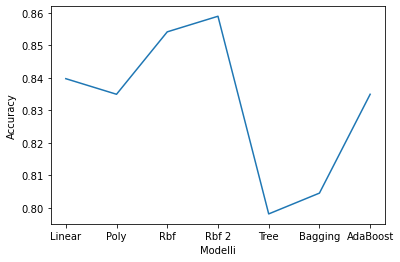

In [105]:
plt.xlabel("Modelli")
plt.ylabel("Accuracy")
plt.plot(x, accs)
plt.show()